In [3]:
# !pip install pandas

In [4]:
# !pip install matplotlib

In [6]:
# pip install psycopg2-binary

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import psycopg2

In [13]:
conn = psycopg2.connect(
    host="postgres",
    database="basededatos",
    user="usuario",
    password="contraseña",
    port=5432
)

In [10]:
cur = conn.cursor()

# Crear tabla
cur.execute("""
    CREATE TABLE IF NOT EXISTS ventas (
        id SERIAL PRIMARY KEY,
        producto VARCHAR(50),
        cantidad INT,
        precio DECIMAL
    )
""")

# Insertar datos
cur.execute("""
    INSERT INTO ventas (producto, cantidad, precio) VALUES
    ('Manzanas', 10, 0.5),
    ('Naranjas', 5, 0.7),
    ('Peras', 8, 0.6)
""")

conn.commit()
cur.close()

In [11]:
pd.read_sql_query("SELECT * FROM ventas", con=conn)

/tmp/ipykernel_236/2172383197.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql_query("SELECT * FROM ventas", con=conn)


,id,producto,cantidad,precio
0,1,Manzanas,10,0.5
1,2,Naranjas,5,0.7
2,3,Peras,8,0.6


In [12]:
pd.read_sql_query("SELECT * FROM ventas WHERE cantidad > 5", con=conn)

/tmp/ipykernel_236/1682562318.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql_query("SELECT * FROM ventas WHERE cantidad > 5", con=conn)


,id,producto,cantidad,precio
0,1,Manzanas,10,0.5
1,3,Peras,8,0.6


/tmp/ipykernel_236/3732189736.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql_query("SELECT * FROM ventas", con=conn).plot(kind='bar', x='producto', y='cantidad', title="graficasa bro")


<Axes: title={'center': 'graficasa bro'}, xlabel='producto'>

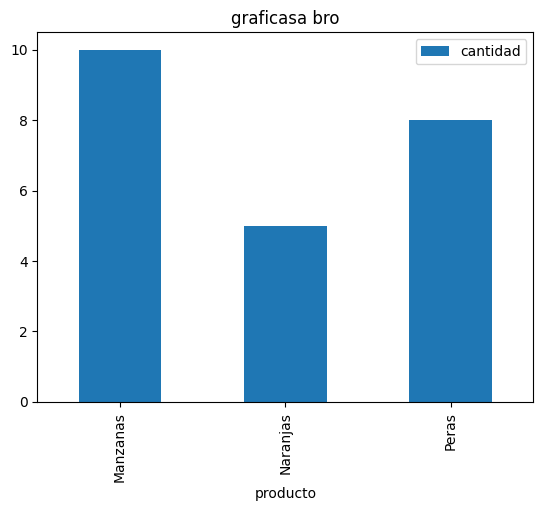

In [16]:
pd.read_sql_query("SELECT * FROM ventas", con=conn).plot(kind='bar', x='producto', y='cantidad', title="graficasa bro")